# Phys F303 : Projet numérique

## Onur YAVAS, Jérémy BROISSIN

### I. Introduction générale :

Pour ce projet, nous devons résoudre les exercices proposés dans le Numerical MOOC pour la section concernant la méthode du Monte Carlo. 
Tout d'abord, nous commençons par cette section avec un rappel bref de ce qu'est la méthode de Monte Carlo, ainsi que son utilisation dans ce projet.
Ensuite, pour chaque exercice, nous allons rappeler brièvement ce en quoi ils consistent, les résoudre et donner une petite conclusion. 
Enfin, nous terminerons par une conclusion générale qui reprendra la totalité de ce projet. 

La méthode de Monte Carlo, ou simulation, est d'utiliser une représentation abstraite (ou modèle) d’un système ou d’un problème, ici physique, et d’étudier l’évolution de ce modèle sans faire fonctionner le système réel. Il s'agit d'une méthode d’estimation d’une quantité numérique qui utilise des nombres aléatoires. 
Pour ce projet, nous allons utiliser cette méthode pour étudier un problème mathématique et deux physiques : les Nombres Aléatoires, le Mouvement Brownien et le Modèle d'Ising. 

Avant d'entamer la prochaine section, implémentons les bibliothèques qui nous serons utiles pour les différents codes:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random as rd
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### II. Les nombres aléatoires

Générer des nombres aléatoires n'est pas une chose aisée. Par ailleurs, en pratique, ces dits nombres ne sont pas réellement aléatoires. Ils proviennent de diverses algorithmes qui créent  des séquences à très longue périodicité. On peut aussi les avoir grâce à des distributions, i.e la probalité d'avoir ces nombres dans un intervalle précis varie en fonction de ce-dernier. 

Le but de cet exercice, dans un premier temps,  est de voir que lorsqu'on tire aléatoirement des nombres, dans un certain intervalle grâce à la fonction random, pour un grand nombre de tirage, la distribution devient uniforme. Cela sera vérifier en normalisant les histogrammes qui en découleront. 
Nous allons voir cela en tirant à la suite 10 nombres, puis 10 000, et enfin 1 000 000; le tout pour un intervalle entre 15 et 30. Remarquons déjà que la fonction random renvoie pour chaque nombre aléatoire, une valeur de 0 ou 1; il faudra donc renormaliser l'intervalle choisie. 

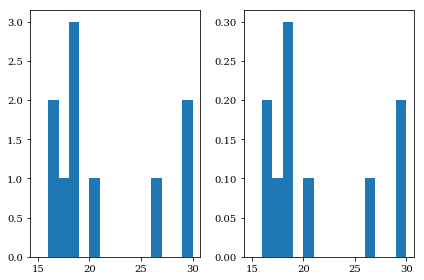

In [2]:
# Échantillon de 10

a=15
b=30
x = np.random.random_sample(10)
y = (b-a)*x+a

binwidth=1
plt.figure()

plt.subplot(121)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=False);
plt.subplot(122)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=True);
plt.tight_layout()

On peut voir déjà que pour un petit tirage comme celui-ci, on se trouve très loin du fait qu'on peut avoir une distribution uniforme. Voyons voir pour un tirage 1000 fois plus grand. 

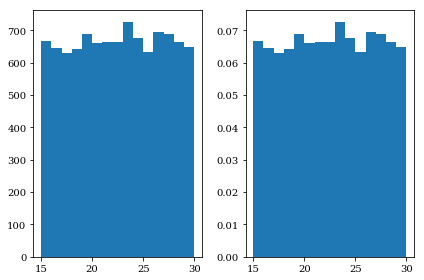

In [3]:
# Échantillon de 10 000

a=15
b=30
x = np.random.random_sample(10000)
y = (b-a)*x+a

binwidth=1
plt.figure()

plt.subplot(121)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=False);
plt.subplot(122)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=True);
plt.tight_layout()

Rien qu'en utilisant un facteur 1000 sur le nombre du tirage, on s'approche de la distribution uniforme que l'on cherche. Néanmoins, il faudra utiliser un facteur 100 pour voir qu'il nous faut un très grand nombre de tirage pour obtenir cette distribution. 

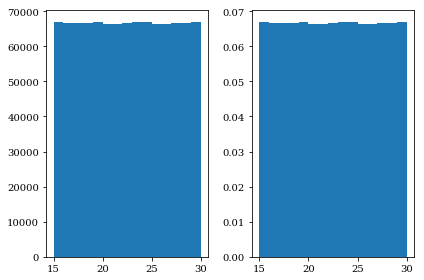

In [4]:
# Échantillon de 1 000 000

a=15
b=30
x = np.random.random_sample(1000000)
y = (b-a)*x+a

binwidth=1
plt.figure()

plt.subplot(121)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=False);
plt.subplot(122)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=True);
plt.tight_layout()

Avec cette dernière implémentation, on sait qu'on doit tourner autour d'un nombre de tirage propotionnel à $10^6$ afin d'obtenir des nombres aléatoires de manière uniforme.

Concentrons-nous maintenant sur le premier exercice de cette partie ; dans le Numerical MOOC, les distributions gausiennes et exponentielles ont été implémenté grâce à la méthode de réjection de Von Neuman. Mais il se trouve dans les bibliothèques de python, il existe déjà des fonctions qui sont supposés donner les mêmes résultats. Nous allons vérifier cela.

Remarquons qu'ici, nous allons utiliser un tirage de $10^4$ nombres pour chacune des fonctions.

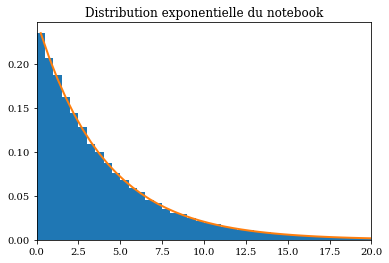

In [5]:
alpha = 0.25 # Taux de croissance de la distribution exponentielle
x = np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

# Implémentation de l'histogramme
binwidth=0.5
plt.xlim(0,20)
bins=np.arange(0.,21., binwidth)
plt.hist(y,bins,density=True);
plt.title("Distribution exponentielle du notebook")

# Implémentation des centres des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

La biblithèque de Python contient la fonction "random.expovariate()" qui prend comme paramètre $\alpha$ et qui renvoie un nombre de 0 à l'infini. Notons que pour une bonne comparaison, nous avons pris $\alpha = 0.25$ dans les deux cas.

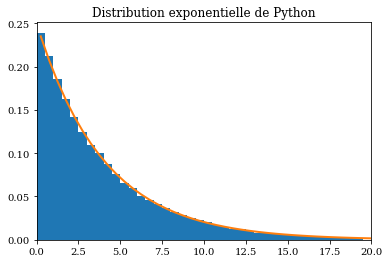

In [6]:
y = [rd.expovariate(0.25) for i in range(100000)]

# Implémentation de l'histogramme
binwidth=0.5
plt.xlim(0,20)
plt.hist(y,bins=np.arange(0.,20., binwidth),density=True);
plt.title("Distribution exponentielle de Python")

# Implémentation des centres des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

En utilisant le même ajustement que sur la distribution précédente. On voit que les deux distributions concordent, ainsi celle de Python nous donne le résultat attendu. 

Le but maintenant est de voir si on obtient la même chose avec la distribution gaussienne. Nous allons reprendre exactement les mêmes étapes, en prenant garde à convertir les paramètres pour l'utilisation de la gaussienne. 
Remarquons, une nouvelle fois encore, qu'ici on utilise un tirage proportionnel à $10^5$.

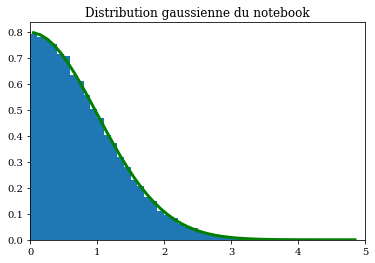

In [7]:
# Nombre de tirage de nombres aléatoires
N = 100000
K = 1.4

# Liste vide pour mettre les nombres finaux
h=[]

for i in range(N):
    u1 = np.random.random_sample()
    
    # Distribution de g selon la distribution gaussienne
    g = np.log(1/(1-u1))
    
    # Génération d'un second nombre pour la condition d'acceptation/de rejet
    u2 = np.random.random_sample()
    
    # Le pas de la condition d'acceptation/de rejet
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi) / \
                (K*np.exp(-g))
    if (u2<ratio):
        # On remplit la list h par les nombres g obtenus
        h.append(g)

# Implémentation de l'histogramme
binwidth=0.1
plt.xlim(0,5)
bins=np.arange(0.,5., binwidth)
plt.hist(h,bins=np.arange(0.,5.1, binwidth),density=True);
plt.title("Distribution gaussienne du notebook")

# Implémentation des centres des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

Ici, la biliothèque de Python contient la fonction "random.gauss()" prenant comme paramètre $\mu$ et $\sigma$ et qui renvoie un  nombre réel. Afin d'avoir une meilleure comparaison nos résultats, nous ne prendrons que les résultats positifs.

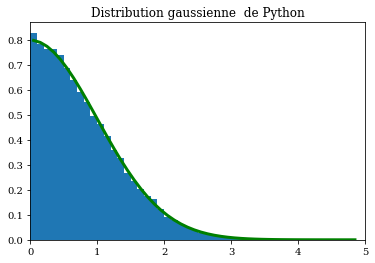

In [8]:
y = [rd.gauss(0,1) for i in range(100000)]

# Implémentation de l'histogramme
binwidth=0.1
plt.xlim(0,5)
plt.hist(y,bins=np.arange(0.,5., binwidth),density=True)
plt.title("Distribution gaussienne  de Python")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

De nouveau, avec le même ajustement, nous percevons que les deux méthodes concordent. 


Avec cet exercice, nous avons su démontrer que l'implémentation des fonctions de la biliothèque de Python suivaient la logique de la méthode de Von Neuman. Néanmoins, si on s'intéresse aux détails, on perçoit que ces implémentations ont quelques irrégularités avec la méthode de rejet. Cela est naturelle car la méthode demande plusieurs étapes précisées tandis que les fonctions de python font tout d'un seul trait. 

Une autre méthode pour générer des nombres aléatoires selon une distribution gaussienne est la méthode de $Box-Muller$ qui prend deux distributions uniformes indépendantes et qui renvoie deux distributions gaussiennes normales. Pour ce second exercie de cette partie, on doit simplement vérifier que cette méthode fonctionne comme les deux méthodes précédentes.

La méthode de Box-Muller transforme des coordonnées polaires uniformément distribuées en des coordonnées cartésiennes normalement distribuées.

Implémentons cette méthode et regardons direcement les résultats:

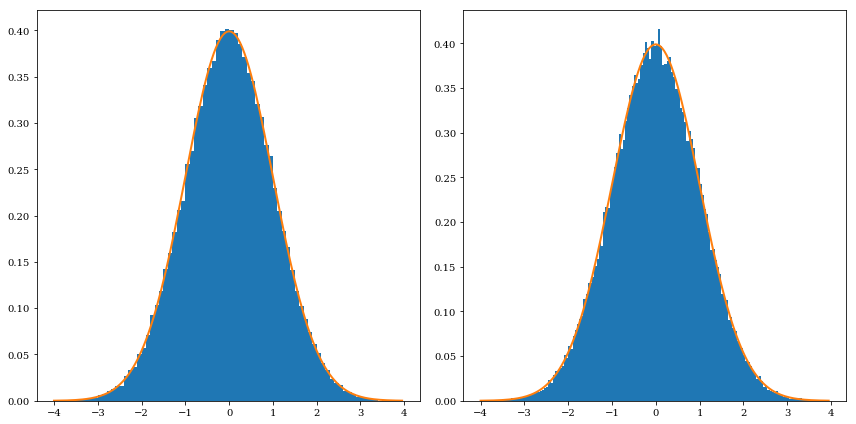

In [9]:
# Deux distributions uniformes indépendantes de 100.000 tirages chacunes
U1 = np.random.random_sample(100000)
U2 = np.random.random_sample(100000)

# Obtention des Gaussiennes normales par Box-Muller
Z1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
Z2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

#Plots et fits

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(Z1,bins=np.arange(-4.,4., binwidth),density=True)
binwidth=0.05
x=np.arange(-4.,4., binwidth)
plt.plot(x,(1/(np.sqrt(2*np.pi)))*np.exp((-1/2)*x**2),lw=2)

plt.subplot(122)
plt.hist(Z2,bins=np.arange(-4.,4., binwidth),density=True)
plt.tight_layout()
binwidth=0.05
x=np.arange(-4.,4., binwidth)
plt.plot(x,(1/(np.sqrt(2*np.pi)))*np.exp((-1/2)*x**2),lw=2)

Nous obtenons bien deux nouvelles distributions gaussiennes en partant de deux distributions uniformes indépendantes.

Après avoir vérifié que la fonction "random" générait des nombres aléatoires suivant une distribution uniforme après un tirage d'un nombre proportionnel à $10^6$, nous avons implémenté les distributions exponentielle et gaussienne comme proposées dans le notebook du MOOC ainsi qu'avec les fonctions préconçues dans la biliothèque de Python. Nous avons finalement généré une distribution gaussienne normale en partant de deux distributions uniformes à l'aide de la méthode Box-Muller.

### III. Le mouvement Brownien

Ce mouvement, aussi appelé processus de Wiener, décrit le mouvement aléatoire d'une grosse particule (par exemple, une goutte d'encre) immergée dans un fluide (toujours par exemple, l'eau) et qui n'est soumise à aucune autre intéraction que les chocs avec les plus petites particules. 

Décrire ce mouvement n'est pas une chose simple, il d'ailleurs impossible de connaître la trajectoire de chaque particules lorsque celle-ci intéragissent. 
Pour cette partie, nous modéliserons un modèle stochastique du mouvement brownien en se basant sur l'équation suivante : 
$$dx= \sqrt{2 \alpha dt}\mathcal{N}(0,1)$$ 
Et où le mouvement de chaque molécule suit une gaussienne.

Commençons d'abord par réutiliser l'implémentation du mouvement brownien comme donné dans le notebook du MOOC associé: 

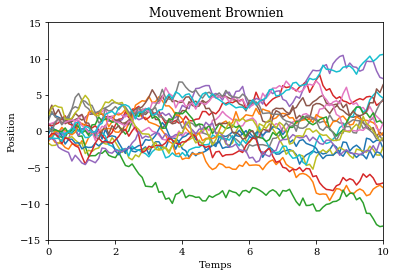

In [10]:
# Génération d'un ensemble de positions initiales selon une distribution gaussienne 
npart=100000

T=50.0
nt=500
dt=T/nt
alpha=2.0

sigma = 1.0
x0 = np.random.normal(loc=0,scale=sigma,size=npart)
t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)

for i in range(20):
    plt.title("Mouvement Brownien")
    plt.xlabel("Temps")
    plt.ylabel("Position")
    plt.xlim(0,10)
    plt.ylim(-15,15)
    plt.plot(t,x[:,i])

Le mouvement de chaque particule est ainsi déterminé de manière alétoire et indépendamment des autres. 

Nous pouvons alors voir qu'elles prennent rapidement des trajectoires différentes pour une position initiale quasi-commune. 
Si nous nous intéressons qu'à une seule trajectoire, nous avons en fait modelisé le chemin emprunté par une particule dans un milieu dans lequel elle collisionne fréquemment avec les autres particules.

Ajoutons maintenant au déplacement une contribution dépendante du temps $cdt$ où $c$ n'est rien d'autre qu'une constante et observons le mouvement pour différentes valeurs de $c$: 
$$ dx = cdt +\sqrt{2 \alpha dt} \mathcal{N}(0,1)$$

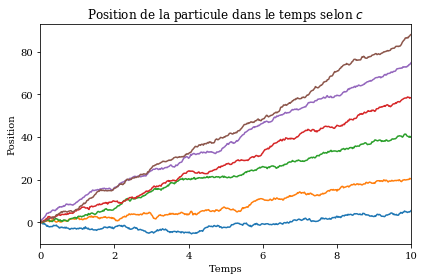

In [12]:
# Simulation du temps total
T=10.0

# Nombre du pas temporel et de l'intervalle temporel dt
nt=500
dt=T/nt

# Coefficient de diffusion
alpha=2.0

# Position des particules et condition initiale
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)
x[0]=0

c = 0
while c <= 10:
    for i in range(nt):
        x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1)
    c += 2
    plt.title("Position de la particule dans le temps selon $c$")
    plt.xlabel("Temps")
    plt.ylabel("Position")
    plt.xlim(0,10)
    plt.plot(t,x)
    plt.tight_layout()

On remarque que plus la valeur de $c$ augmente et plus le déplacement de la particule s'éloigne de sa position d'origine. Nous interprétons $c$ comme étant la vitesse initiale et constante de la particule. 

Il est donc clair que plus la vitesse de la particule est élevée et plus vite elle s'éloignera de sa position initiale. La vitesse, telle qu'elle est implémentée ici, ne dépend pas des collisions avec les autres particules ce qui implique que peu importe les collisions qu'elles subissent, la particule garde sa vitesse constante tout en ayant une contribution supplémentaire à son déplacement due aux autres particules (ici, modelisée par une Gaussienne).

Nous avons donc modélisé une version stochastique du mouvement brownien sans y ajouter d'autres termes. Maintenant regardons comment se comporte ce même modèle en y ajoutant un terme de friction $\gamma$, ce qui nous donne l'équation suivante :
$$ dx = \sqrt{2 \alpha dt} \mathcal{N}(0,1) - \gamma x dt$$


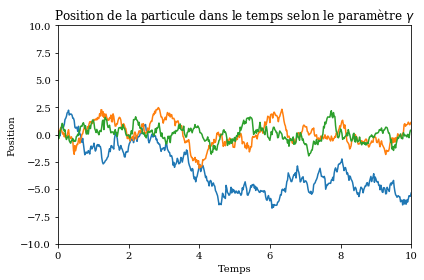

In [13]:
# Simulation du temps total
T=10.0

# Nombre du pas temporel et de l'intervalle temporel dt
nt=500
dt=T/nt

# Coefficient de diffusion
alpha=2.0

# Position des particules et condition initiale
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)
x[0]=0

gamma = 0
while gamma <= 2:
    for i in range(nt):
        x[i+1]=x[i]-gamma*x[i]*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1)    
    gamma += 1
    plt.title("Position de la particule dans le temps selon le paramètre $\gamma$")
    plt.xlabel("Temps")
    plt.ylabel("Position")
    plt.xlim(0,10)
    plt.ylim(-10,10)
    plt.plot(t,x)
    plt.tight_layout()

Obervons que plus le coéfficient de friction est grand et moins la particule parcourt de distance durant un temps donné. 
Elle subit de plus en plus les collisions avec ses voisines, ce qui va la faire rester de plus en plus longtemps à la même position (généralement, proche de la position initiale).

Le but maintenant est de regarder le comportement de ce mouvement brownien pour des temps très grands : 

C:\Users\brois\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\Users\brois\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


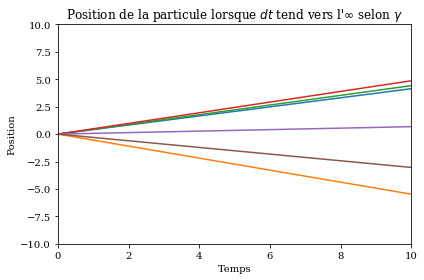

In [21]:
# Simulation du temps total
T=10000.0

# Nombre du pas temporel et de l'intervalle temporel dt
nt=500
dt=T/nt

# Coefficient de diffusion
alpha=2.0

# Position des particules et condition initiale
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)
x[0]=0

gamma = 0
while gamma <= 5:
    for i in range(nt):
        x[i+1]=x[i]-gamma*x[i]*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1)    
    gamma += 1
    plt.title("Position de la particule lorsque $dt$ tend vers l'$\infty$ selon $\gamma$")
    plt.xlabel("Temps")
    plt.ylabel("Position")
    plt.xlim(0,10)
    plt.ylim(-10,10)
    plt.plot(t,x)
    plt.tight_layout()

Pour des temps très grands, les particules tendent alors vers un état stationnaire. 
Le mouvement brownien semble même imperceptible sur des grandes échelles de temps, ceci nous confirme donc bien que ce caractère est microscopique et donc propre à l'échelle des particules.

Pour en conclure pour cette partie, nous avons implémenté le mouvement brownien, puis nous avons analysé le comportement d'une particule lorsque nous rajoutions un terme terme temporel ou un terme de friction dans son équation du mouvement. 
Nous voyons que plus la vitesse de la particule est grande et plus celle-ci s'éloignera de sa position initiale et au plus la particule subira de collisions de la part de ses voisines et moins elle pourra se déplacer. Remarquons également que l'état devient stationnaire pour des grandes échelles de temps, ce qui indique que le mouvement brownien est de caractère microscopique.

### IV. Le modèle d'Ising

Ce modèle, aussi appelé modèle de Lenz-Ising, est utilisé pour modélisé différents phénomènes où les effets collectifs sont donnés par les interactions entre deux particules à deux états. 

Un exemple concrêt est celui de la modélisation du caractère magnétique d'un ferromagnétique que l'on suppose composé de plusieurs petits aimants que nous appelerons ici "spins". 
Ces spins se trouvent sur un réseau carré et ont un sens soit vers le haut soit vers le bas et ne peuvent intéragir qu'avec leurs voisins les plus proches. 
On peut alors caractériser la magnétisation du matériau en sachant que l'état le plus stable pour une paire de spins est l'état dans lequel elles pointent vers des directions opposées.

Afin de prévoir ce comportement, l'idéal serait de moyenner le modèle sur tous les arrangements de spins possibles, ce qui est fort compliqué notamment pour les maillages 100x100 que nous prendrons.

Pour remédier à cela, nous utilisons l'algorithme de Metropolis,afin de s'assurer du résultat quelque soit la disposition des dipôles au départ, dont le raisonnement est le suivant:
- Après avoir pris une grille de spins aléatoire, on choisit un spin du réseau et on change son orientation.
- Si l'énergie du système diminue, c'est cette nouvelle orientation qui est choisie.
- En revanche si l'énergie du système augmente, la nouvelle orientation est accordée avec une probabilité $e^{-\beta\Delta E}$

Tout d'abord, implémentons de nouveau les diverses bibliothèques dont nous avons besoin:

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

Prenons ensuite la fonction "initial_state" qui, pour un maillage donné, nous renvoie une disposition aléatoire des spins sur la grille. Il est donc clair qu'à chaque lancement de la fonction, la grille de départ sera différente.

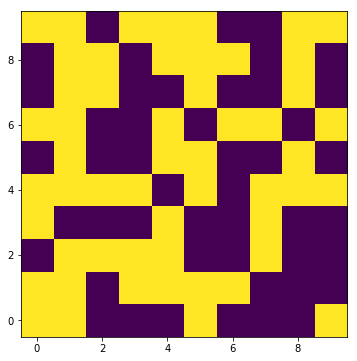

In [2]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Spin aléatoires uniformément distribués en 0 et 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Lorsque r=0, on y associe un spin négatif
    r[r==0] =-1

    return r

# Maillage 10x10
nx = 10
ny = 10

# Constante de couple non-dimmensionnelle J/(kb*T)
alpha = 0.1

# Initial spins at each site
sp = initial_state(nx,ny)

plt.figure(figsize=(6,6))
plt.imshow(sp,interpolation="none",origin='lower')

Nous allons maintenant effectuer l'agorithme de Metropolis pour cette grille, en partant à chaque fois du site [5,5]. Notons que nous prenons dans ce cas-ci une grille 10x10 afin que le site [5,5] ainsi que ses voisins soient facilement repérables et donc que les résultats soient facilement vérifiables. 

Nous pouvons observer que l'algorithme donne bien les prédictions théoriques ci-dissous:
- 4 voisins up (0 down) = 4.0,2 - 0.0,2 = 0,8 --> $\Delta E = e^{-\Delta E}$ = 2,225
- 3 voisins up (1 down) = 3.0,2 - 1.0,2 = 0,4 --> $\Delta E = e^{-\Delta E}$ = 1,492
- 2 voisins up (2down) = 2.0,2 - 2.0,2 = 0 --> $\Delta E = e^{-\Delta E}$ = 1,00
- 1 voisin up (3 down) = 1.0,2 - 3.0,2 = -0,4 --> $\Delta E = e^{-\Delta E}$ = 0,67
- 4 voisins down (0 up) = 0.0,2 - 4.0,2 = -0,8 --> $\Delta E = e^{-\Delta E}$ = 0,449

In [3]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [4]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [5]:
NMC = 100000
states = np.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = np.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

1.0


Le but ensuite est d'observer la magnétisation d'un matériau pour différentes valeurs de $\alpha$ entre 0 et 1, et où $\alpha$ est la constante de couplage du matériau quotionnée par l'énergie thermique liée à la magnétisation.

Nous allons prendre pour commencer une grille où tout les spins sont initialement dans l'état $up$. Remarquons qu'ici, on reprend un maillage 100x100.


In [6]:
nx = 100
ny = 100
sp = np.ones([nx,ny])

def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix = np.random.randint(0,nx)
            iy = np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i] = sp.copy()
    return states

Prenons maintenant toutes les valeurs de $\alpha$ entre 0 et 1 par pas de 0,1. 

Notons que l'algorithme prend un certain temps pour s'exécuter sur chaque valeur de $\alpha$ car nous demandons à chaque fois une grille 100x100 ce qui fait tout de même $10^4$ sites. C'est donc pour des raisons de clareté que nous avons décidé d'exécuter chaque étape dans une cellule différente. Ceci permet au lecteur de voir en temps réel la progression de l'exécution.

In [7]:
NMC=100
sp = np.ones([nx,ny])
alpha=0.1
states_0_1 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

fig = plt.figure(figsize=(6,3))
img1 = plt.imshow(states_0_1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

def animate(i):
    img1.set_array(states_0_1[i])

anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.title("alpha = 0,1")
plt.close()
HTML(anim.to_html5_video())